# Employee Engagement Evaluation

## Scope

All data from the Universal Exports employee engagement survey has now been collated.
The table in Doc.A contains the raw data output from the survey. The survey consisted of
10 questions relating to the effectiveness of communications, belief in the leaders and
employee engagement. Your task is to analyze the data to find the key results from the
survey.

Your aims should be to establish:
- The question scores for all employees
- The overall engagement score for all employees
- Any difference in overall engagement score between different grades /departments / roles
- Any other interesting findings e.g. data correlations

The report is your chance to tell the story of your analysis. What are the key issues that
affect employees at Universal Exports? What challenges do their managers face when
trying to improve engagement? Think about what information is important to get across;
what are the key points? Managers do not have time to go into every small detail; they
need to be able to have all the information at a glance.

Use the format of your choice to tell that story, providing clear and concise insight,
focusing on key themes and findings, including any interesting correlations in the data.

Notes:
1. Responses to each question are represented on a scale of 1-5 where:

1 = Strongly disagree
2 = Disagree
3 = Neither agree nor disagree
4 = Agree
5 = Strongly agree

2. Question scores are calculated by the percentage of employees who responded positively (i.e. 4 or 5) to each question.
3. The overall engagement score is calculated by taking an average of the 10 question scores. This is true for overall company score and for the individual
grades.

## Summary

Key Actions to take:- 

- Improve the transparency and fairness when promoting employees.


- Focus on improving engagement for Grade D employees.

### Imports

In [1]:
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

In [2]:
print(f'pandas:{pd.__version__}')
print(f'seaborn:{sns.__version__}')
print(f'altair:{alt.__version__}')
print(f'python:{sys.version}')

pandas:2.0.1
seaborn:0.12.2
altair:5.0.0
python:3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]


In [3]:
BASE = r"C:\\Users\\anand\\Documents\\Employee_engagement"

PATH = BASE + r"\\data\\"

## Read Data

In [4]:
# Read excel
df = pd.read_excel(PATH + r"Doc A_Excel.xlsx", header=1)

# Preview
df.head(10)

,Response id,Department,Manager,Grade,Universal Exports does a good job of keeping me informed about important news and events,I get a sense of achievement from the work I do in my job,Universal Exports has created an environment that encourages me to perform to the best of my abilities,I am proud to work for Universal Exports,I trust and respect the management of Universal Exports,I believe that Universal Exports really cares about my health and wellbeing,"All in all, Universal Exports is effectively managed and well-run",I believe that Universal Exports has fair and transparent processes for promoting people into new roles,I have access to opportunities to develop my career in Universal Exports,My manager treats me fairly
0,1,HR,Yes,D,1,1,1,1,1,1,1,1,1,1
1,2,Marketing,Yes,C,4,3,2,4,4,4,3,4,5,5
2,3,Finance,No,B,5,5,5,4,5,4,4,5,5,5
3,4,IT,No,A,5,4,4,5,4,3,4,4,2,4
4,5,Legal,No,C,4,4,1,2,3,3,3,1,2,4
5,6,HR,Yes,D,4,5,4,3,4,5,4,3,4,5
6,7,HR,No,A,5,4,4,2,4,3,3,4,4,4
7,8,Marketing,Yes,D,3,5,4,5,3,4,4,3,1,4
8,9,Finance,No,C,4,4,4,4,4,4,2,3,4,4
9,10,IT,Yes,D,4,4,4,5,4,4,4,4,4,3


In [5]:
# Shape of data
df.shape

(1000, 14)

In [6]:
# Preview columns
df.head().T

,0,1,2,3,4
Response id,1,2,3,4,5
Department,HR,Marketing,Finance,IT,Legal
Manager,Yes,Yes,No,No,No
Grade,D,C,B,A,C
Universal Exports does a good job of keeping me informed about important news and events,1,4,5,5,4
I get a sense of achievement from the work I do in my job,1,3,5,4,4
Universal Exports has created an environment that encourages me to perform to the best of my abilities,1,2,5,4,1
I am proud to work for Universal Exports,1,4,4,5,2
I trust and respect the management of Universal Exports,1,4,5,4,3
I believe that Universal Exports really cares about my health and wellbeing,1,4,4,3,3


In [7]:
# Mean and quantiles
df.describe().T.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Response id,1000.0,500.50,288.819436,1.0,250.75,500.5,750.25,1000.0
My manager treats me fairly,1000.0,4.04,0.786778,1.0,4.00,4.0,5.00,5.0
I get a sense of achievement from the work I do in my job,1000.0,3.91,0.722788,1.0,4.00,4.0,4.00,5.0
Universal Exports does a good job of keeping me informed about important news and events,1000.0,3.90,0.794123,1.0,4.00,4.0,4.00,5.0
I believe that Universal Exports really cares about my health and wellbeing,1000.0,3.84,0.902893,1.0,3.00,4.0,4.00,5.0
I am proud to work for Universal Exports,1000.0,3.78,0.996289,1.0,3.00,4.0,4.25,5.0
I trust and respect the management of Universal Exports,1000.0,3.58,0.827215,1.0,3.00,4.0,4.00,5.0
Universal Exports has created an environment that encourages me to perform to the best of my abilities,1000.0,3.43,0.919753,1.0,3.00,4.0,4.00,5.0
"All in all, Universal Exports is effectively managed and well-run",1000.0,3.42,0.874279,1.0,3.00,4.0,4.00,5.0
I have access to opportunities to develop my career in Universal Exports,1000.0,3.39,1.038739,1.0,3.00,4.0,4.00,5.0


In [8]:
# Department count
df.Department.value_counts()

Department
IT           216
HR           203
Marketing    199
Finance      194
Legal        188
Name: count, dtype: int64

[Text(0, 0, '216'),
 Text(0, 0, '203'),
 Text(0, 0, '199'),
 Text(0, 0, '194'),
 Text(0, 0, '188')]

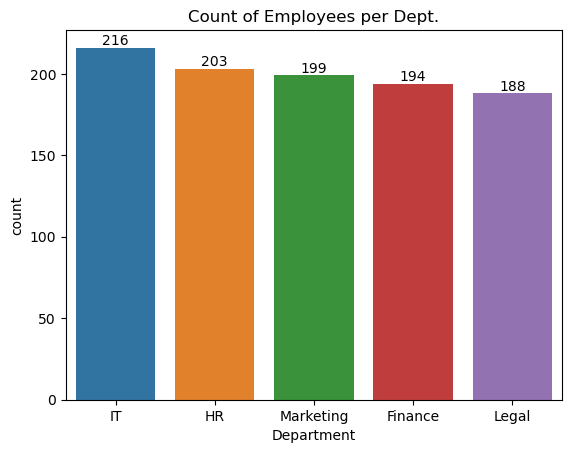

In [9]:
# Plot
ax = sns.barplot(data=pd.DataFrame(df.Department.value_counts()).reset_index(), y='count', x='Department')
ax.set_title('Count of Employees per Dept.')
ax.bar_label(ax.containers[0])

In [10]:
# Manager count
df.Manager.value_counts()

Manager
No     673
Yes    327
Name: count, dtype: int64

[Text(0, 0, '673'), Text(0, 0, '327')]

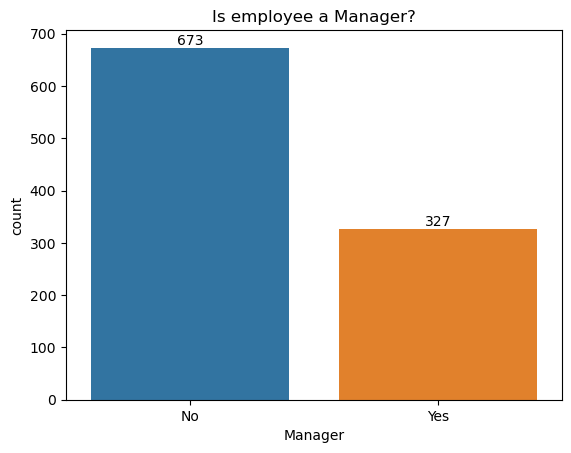

In [11]:
# Plot
ax = sns.barplot(data=pd.DataFrame(df.Manager.value_counts()).reset_index(), y='count', x='Manager')
ax.set_title('Is employee a Manager?')
ax.bar_label(ax.containers[0])

In [12]:
# Grade count
df.Grade.value_counts()

Grade
D    540
C    200
B    180
A     80
Name: count, dtype: int64

[Text(0, 0, '540'), Text(0, 0, '200'), Text(0, 0, '180'), Text(0, 0, '80')]

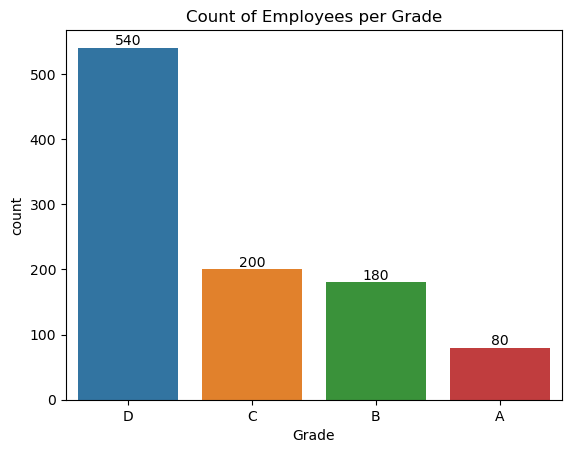

In [13]:
# Plot
ax = sns.barplot(data=pd.DataFrame(df.Grade.value_counts()).reset_index(), y='count', x='Grade')
ax.set_title('Count of Employees per Grade')
ax.bar_label(ax.containers[0])

In [14]:
# Check for null values
df.isna().any()

Response id                                                                                                False
Department                                                                                                 False
Manager                                                                                                    False
Grade                                                                                                      False
Universal Exports does a good job of keeping me informed about important news and events                   False
I get a sense of achievement from the work I do in my job                                                  False
Universal Exports has created an environment that encourages me to perform to the best of my abilities     False
I am proud to work for Universal Exports                                                                   False
I trust and respect the management of Universal Exports                                         

In [15]:
# Rename columns
df.columns = [
    'response_id',
    'dept',
    'manager',
    'grade',
    'informed',
    'achievement',
    'best_environment',
    'proud',
    'trust_respect',
    'health',
    'effectively_managed',
    'transparency_promotion',
    'opportunities',
    'manager_fair',
    
]

# Preview
df.head(1)

,response_id,dept,manager,grade,informed,achievement,best_environment,proud,trust_respect,health,effectively_managed,transparency_promotion,opportunities,manager_fair
0,1,HR,Yes,D,1,1,1,1,1,1,1,1,1,1


## Question Score

In [16]:
# Positive or negative feedback
question = pd.DataFrame(np.where(df.iloc[:,4:]>3, 'Positive','Negative'),columns = df.iloc[:,4:].columns)

# Preview
question.head()

,informed,achievement,best_environment,proud,trust_respect,health,effectively_managed,transparency_promotion,opportunities,manager_fair
0,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
1,Positive,Negative,Negative,Positive,Positive,Positive,Negative,Positive,Positive,Positive
2,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
3,Positive,Positive,Positive,Positive,Positive,Negative,Positive,Positive,Negative,Positive
4,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Positive


In [17]:
# Calculate ratio
question = question.apply(pd.Series.value_counts)/question.count() *100

# Preview
question

,informed,achievement,best_environment,proud,trust_respect,health,effectively_managed,transparency_promotion,opportunities,manager_fair
Negative,19.0,20.0,46.0,34.0,37.0,28.0,47.0,68.0,46.0,19.0
Positive,81.0,80.0,54.0,66.0,63.0,72.0,53.0,32.0,54.0,81.0


In [18]:
# Get question score
question[1:]

,informed,achievement,best_environment,proud,trust_respect,health,effectively_managed,transparency_promotion,opportunities,manager_fair
Positive,81.0,80.0,54.0,66.0,63.0,72.0,53.0,32.0,54.0,81.0


In [19]:
# Convert to long format and sort
dfq = question[1:].melt().sort_values('value',ascending=False)

# Preview
dfq

,variable,value
0,informed,81.0
9,manager_fair,81.0
1,achievement,80.0
5,health,72.0
3,proud,66.0
4,trust_respect,63.0
2,best_environment,54.0
8,opportunities,54.0
6,effectively_managed,53.0
7,transparency_promotion,32.0


In [20]:
# Rename columns
dfq.columns=[
    'Questions',
    'Question Score'
]

# Preview
dfq.head(1)

,Questions,Question Score
0,informed,81.0


[Text(0, 0, '81.0'),
 Text(0, 0, '81.0'),
 Text(0, 0, '80.0'),
 Text(0, 0, '72.0'),
 Text(0, 0, '66.0'),
 Text(0, 0, '63.0'),
 Text(0, 0, '54.0'),
 Text(0, 0, '54.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '32.0')]

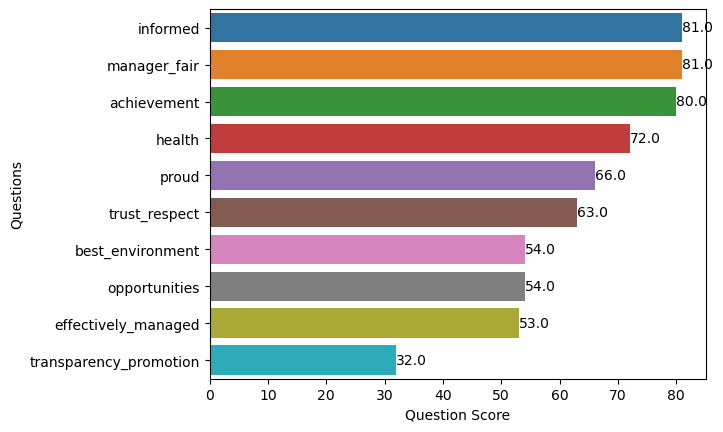

In [60]:
# Plot question score
ax = sns.barplot(data=dfq, y='Questions', x='Question Score',orient='h')
ax.bar_label(ax.containers[0], fmt='%.1f')

In [22]:
# Overall score
dfq['Question Score'].mean()

63.6

In [23]:
# Preview
df.head()

,response_id,dept,manager,grade,informed,achievement,best_environment,proud,trust_respect,health,effectively_managed,transparency_promotion,opportunities,manager_fair
0,1,HR,Yes,D,1,1,1,1,1,1,1,1,1,1
1,2,Marketing,Yes,C,4,3,2,4,4,4,3,4,5,5
2,3,Finance,No,B,5,5,5,4,5,4,4,5,5,5
3,4,IT,No,A,5,4,4,5,4,3,4,4,2,4
4,5,Legal,No,C,4,4,1,2,3,3,3,1,2,4


In [24]:
# Function for returning question socre
def ques_score(df):
    
    # Positive or negative feedback
    question = pd.DataFrame(np.where(df.iloc[:,4:]>3, 'Positive','Negative'),columns = df.iloc[:,4:].columns)
    
    # Calculate ratio
    question = question.apply(pd.Series.value_counts)/question.count() *100
    
    # Convert to long format and sort
    dfq = question[1:].melt()
    
    # Rename columns
    dfq.columns=[
        'Questions',
        'Question Score'
    ]
    
    row = ['overall', dfq['Question Score'].mean()]
    dfq.loc[len(dfq)] = row
    
    return dfq

### Manager/Non-manager

In [25]:
# Question score for managers
ques_score(df[df.manager=='Yes'])

,Questions,Question Score
0,informed,85.321101
1,achievement,84.097859
2,best_environment,47.706422
3,proud,56.574924
4,trust_respect,49.847095
5,health,68.501529
6,effectively_managed,53.211009
7,transparency_promotion,32.415902
8,opportunities,52.293578
9,manager_fair,75.535168


In [26]:
# Question score for non-managers
ques_score(df[df.manager=='No'])

,Questions,Question Score
0,informed,78.900446
1,achievement,78.008915
2,best_environment,57.057949
3,proud,70.579495
4,trust_respect,69.390788
5,health,73.699851
6,effectively_managed,52.897474
7,transparency_promotion,31.797920
8,opportunities,54.829123
9,manager_fair,83.655275


Managers are on average, slighty more satisfied than non-managers

### Department

In [27]:
# Question score for IT
ques_score(df[df.dept=='IT'])

,Questions,Question Score
0,informed,84.259259
1,achievement,87.500000
2,best_environment,59.259259
3,proud,61.111111
4,trust_respect,49.074074
5,health,73.148148
6,effectively_managed,52.777778
7,transparency_promotion,32.407407
8,opportunities,41.666667
9,manager_fair,77.777778


In [28]:
# Question score for HR
ques_score(df[df.dept=='HR'])

,Questions,Question Score
0,informed,74.876847
1,achievement,82.266010
2,best_environment,53.201970
3,proud,70.935961
4,trust_respect,68.965517
5,health,75.862069
6,effectively_managed,51.231527
7,transparency_promotion,24.137931
8,opportunities,62.561576
9,manager_fair,92.610837


In [29]:
# Question score for Marketing
ques_score(df[df.dept=='Marketing'])

,Questions,Question Score
0,informed,81.407035
1,achievement,79.396985
2,best_environment,53.768844
3,proud,66.331658
4,trust_respect,60.301508
5,health,86.432161
6,effectively_managed,48.241206
7,transparency_promotion,28.140704
8,opportunities,59.798995
9,manager_fair,85.427136


In [30]:
# Question score for Finance
ques_score(df[df.dept=='Finance'])

,Questions,Question Score
0,informed,80.412371
1,achievement,69.072165
2,best_environment,61.340206
3,proud,59.278351
4,trust_respect,74.742268
5,health,58.247423
6,effectively_managed,55.154639
7,transparency_promotion,44.329897
8,opportunities,50.515464
9,manager_fair,81.958763


In [31]:
# Question score for legal
ques_score(df[df.dept=='Legal'])

,Questions,Question Score
0,informed,84.042553
1,achievement,80.851064
2,best_environment,41.489362
3,proud,72.872340
4,trust_respect,63.297872
5,health,65.425532
6,effectively_managed,57.978723
7,transparency_promotion,31.382979
8,opportunities,56.382979
9,manager_fair,66.489362


### Grade

In [32]:
# Question score for Grade A
ques_score(df[df.grade=='A'])

,Questions,Question Score
0,informed,100.00
1,achievement,87.50
2,best_environment,87.50
3,proud,75.00
4,trust_respect,100.00
5,health,50.00
6,effectively_managed,50.00
7,transparency_promotion,62.50
8,opportunities,62.50
9,manager_fair,87.50


In [33]:
# Question score for Grade B
ques_score(df[df.grade=='B'])

,Questions,Question Score
0,informed,72.222222
1,achievement,83.333333
2,best_environment,66.666667
3,proud,72.222222
4,trust_respect,66.666667
5,health,77.777778
6,effectively_managed,61.111111
7,transparency_promotion,33.333333
8,opportunities,50.000000
9,manager_fair,94.444444


In [34]:
# Question score for Grade C
ques_score(df[df.grade=='C'])

,Questions,Question Score
0,informed,85.0
1,achievement,70.0
2,best_environment,40.0
3,proud,85.0
4,trust_respect,75.0
5,health,85.0
6,effectively_managed,40.0
7,transparency_promotion,20.0
8,opportunities,70.0
9,manager_fair,85.0


In [35]:
# Question score for Grade D
ques_score(df[df.grade=='D'])

,Questions,Question Score
0,informed,79.629630
1,achievement,81.481481
2,best_environment,50.000000
3,proud,55.555556
4,trust_respect,51.851852
5,health,68.518519
6,effectively_managed,55.555556
7,transparency_promotion,31.481481
8,opportunities,48.148148
9,manager_fair,74.074074


## Overall Employee Engagement

In [36]:
# Calculate overall score
df['overall'] = df.iloc[:,4:].mean(axis=1)

# Preview
df.head(5)

,response_id,dept,manager,grade,informed,achievement,best_environment,proud,trust_respect,health,effectively_managed,transparency_promotion,opportunities,manager_fair,overall
0,1,HR,Yes,D,1,1,1,1,1,1,1,1,1,1,1.0
1,2,Marketing,Yes,C,4,3,2,4,4,4,3,4,5,5,3.8
2,3,Finance,No,B,5,5,5,4,5,4,4,5,5,5,4.7
3,4,IT,No,A,5,4,4,5,4,3,4,4,2,4,3.9
4,5,Legal,No,C,4,4,1,2,3,3,3,1,2,4,2.7


In [37]:
# Overall score average
df.overall.describe()

count    1000.000000
mean        3.626000
std         0.588447
min         1.000000
25%         3.300000
50%         3.700000
75%         3.900000
max         4.900000
Name: overall, dtype: float64

In [38]:
# Function for returning mean and quantiles
def overall(df):
    
    return df.overall.describe()

### Manager/ Non-manager

In [39]:
# Manager stats
overall(df[df.manager=='Yes'])

count    327.000000
mean       3.553517
std        0.630107
min        1.000000
25%        3.200000
50%        3.600000
75%        3.900000
max        4.900000
Name: overall, dtype: float64

In [40]:
# Non-manager stats
overall(df[df.manager=='No'])

count    673.000000
mean       3.661218
std        0.564234
min        1.000000
25%        3.400000
50%        3.700000
75%        3.900000
max        4.900000
Name: overall, dtype: float64

### Department

In [41]:
# IT stats
overall(df[df.dept=='IT'])

count    216.000000
mean       3.662500
std        0.544427
min        2.100000
25%        3.275000
50%        3.600000
75%        3.900000
max        4.800000
Name: overall, dtype: float64

In [42]:
# HR stats
overall(df[df.dept=='HR'])

count    203.000000
mean       3.674384
std        0.544854
min        1.000000
25%        3.400000
50%        3.700000
75%        3.900000
max        4.900000
Name: overall, dtype: float64

In [43]:
# Marketing stats
overall(df[df.dept=='Marketing'])

count    199.000000
mean       3.658794
std        0.724472
min        1.000000
25%        3.400000
50%        3.700000
75%        4.000000
max        4.900000
Name: overall, dtype: float64

In [44]:
# Finance stats
overall(df[df.dept=='Finance'])

count    194.000000
mean       3.585052
std        0.593779
min        2.100000
25%        3.425000
50%        3.700000
75%        3.900000
max        4.800000
Name: overall, dtype: float64

In [45]:
# Legal stats
overall(df[df.dept=='Legal'])

count    188.000000
mean       3.539362
std        0.504253
min        1.000000
25%        3.100000
50%        3.700000
75%        3.900000
max        4.400000
Name: overall, dtype: float64

### Grade

In [46]:
# Grade A stats
overall(df[df.grade=='A'])

count    80.000000
mean      3.812500
std       0.258709
min       3.400000
25%       3.675000
50%       3.800000
75%       3.925000
max       4.300000
Name: overall, dtype: float64

In [47]:
# Grade B stats
overall(df[df.grade=='B'])

count    180.000000
mean       3.761111
std        0.598078
min        2.300000
25%        3.500000
50%        3.800000
75%        3.900000
max        4.800000
Name: overall, dtype: float64

In [48]:
# Grade C stats
overall(df[df.grade=='C'])

count    200.000000
mean       3.670000
std        0.435948
min        2.700000
25%        3.475000
50%        3.700000
75%        3.825000
max        4.500000
Name: overall, dtype: float64

In [49]:
# Grade D stats
overall(df[df.grade=='D'])

count    540.000000
mean       3.537037
std        0.650473
min        1.000000
25%        3.200000
50%        3.600000
75%        3.900000
max        4.900000
Name: overall, dtype: float64

In [50]:
# Managers in grade D
df[df.grade=='D'].manager.value_counts()

manager
Yes    311
No     229
Name: count, dtype: int64

In [51]:
# Managers in grade A
df[df.grade=='A'].manager.value_counts()

manager
No    80
Name: count, dtype: int64